## Loading the Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set()

# Read the palmer penguin dataset into a pandas DataFrame object with seaborn
df = pd.read_csv("palmer_penguins.csv")

Using the logistic regression model, Julia is going to investigate data features like bill length, bill depth and flipper length to classify as penguin as either Adelie or Chinstrap.

## Observing Seperable Vs. Non-Seperable Data

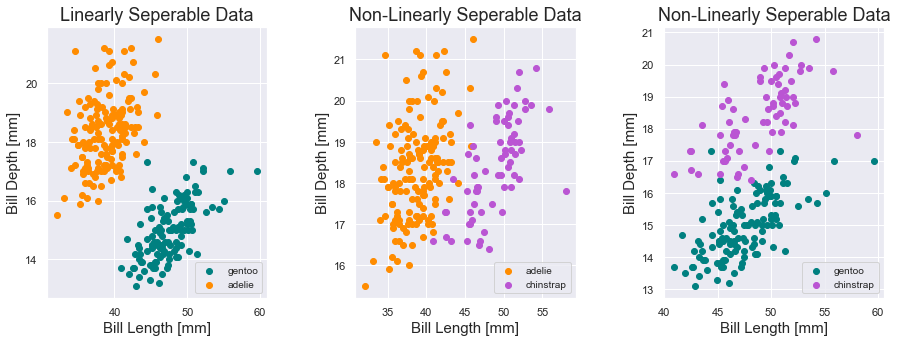

In [2]:
#Creating individual dataframe for each of the penguin species 
gentoo = df[df.species == "Gentoo"]
adelie = df[df.species == "Adelie"]
chinstrap = df[df.species == "Chinstrap"]

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,5))

# Gentoo Vs. Adelie Scatter
ax1.scatter(gentoo.bill_length_mm, 
            gentoo.bill_depth_mm, 
            color = "teal", 
            label = "gentoo")
ax1.scatter(adelie.bill_length_mm, 
            adelie.bill_depth_mm, 
            color = "darkorange", 
            label = "adelie")
ax1.set_xlabel("Bill Length [mm]", fontsize = 15)
ax1.set_ylabel("Bill Depth [mm]", fontsize = 15)
ax1.legend(fontsize = 10, loc = "lower right")
ax1.set_title("Linearly Seperable Data", fontsize = 18)


# Chinstrap Vs. Adelie Scatter
ax2.scatter(adelie.bill_length_mm, 
            adelie.bill_depth_mm, 
            color = "darkorange", 
            label = "adelie")
ax2.scatter(chinstrap.bill_length_mm, 
            chinstrap.bill_depth_mm, 
            color = "mediumorchid", 
            label = "chinstrap")
ax2.set_xlabel("Bill Length [mm]", fontsize = 15)
ax2.set_ylabel("Bill Depth [mm]", fontsize = 15)
ax2.legend(fontsize = 10, loc = "lower right")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)

# Chinstrap Vs. Gentoo Scatter
ax3.scatter(gentoo.bill_length_mm, 
            gentoo.bill_depth_mm, 
            color = "teal", 
            label = "gentoo")
ax3.scatter(chinstrap.bill_length_mm, 
            chinstrap.bill_depth_mm, 
            color = "mediumorchid", 
            label = "chinstrap")
ax3.set_xlabel("Bill Length [mm]", fontsize = 15)
ax3.set_ylabel("Bill Depth [mm]", fontsize = 15)
ax3.legend(fontsize = 10, loc = "lower right")
ax3.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.subplots_adjust(wspace=0.4)

plt.show()

Of course, not all decisions are black and white. Data is seldom is distinctly divided as in the case of the Gentoo and Adelie comparison. More often than not, we deal with cases of groups of data that are not linearly seperable like the Adelie and Chinstrap comparison. What do we do in cases like these? 

For starters, we realize that there will inevitably be some casualties. Our model no matter how well trained and designed will fail at times and may even fail often. Such is the nature of non-linearly seperable data.

With interspersed data, there's more grey area - more ambiguity. So there might be times when we might be more certain about a data point belonging to a certain group versus the other and there might also be times when we might not be so certain. This is precisely why in cases like these it makes the most sense to involve probability - and why we turn to the logistic regression neuron model - because probability is the numerical measure of certainity. 

If there are two categories, the logistic regression model will assign each data point a probability of being in one particular group over the other.

Let's try this out with Adelie and Chinstrap data. Though not highly interspersed, there is some degree of mixing in the data points. We notice that there are some bill lengths that (especially those lying between the 40-45 mm range) could belong to either species of penguin. Lets investigate this further.

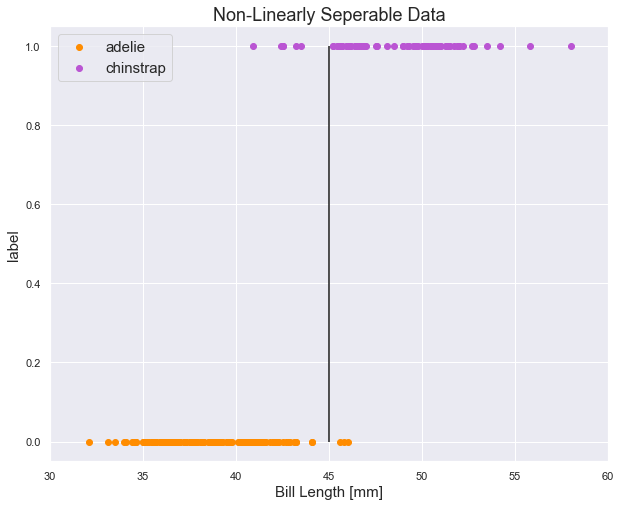

In [3]:
# We use a boolean classification/label to differentiate between the data points of the two species

# Adelie - 1
# Chinstrap - 0

plt.figure(figsize = (10, 8))
plt.xlim((30, 60 ))
plt.scatter(adelie.bill_length_mm, 
            np.zeros(len(adelie.index)), 
            color = "darkorange", 
            label = "adelie")
plt.scatter(chinstrap.bill_length_mm, 
            np.ones(len(chinstrap.index)), 
            color = "mediumorchid", 
            label = "chinstrap")
plt.vlines(45, 0.0, 1.0)
plt.xlabel("Bill Length [mm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

## Building a Logistic Regression Neuron

In [40]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

#Our loss function of choice
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

# Logistic Regression Neuron
class SingleNeuron(object):
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)
    
    # Plots the trajectory of the cost function
    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()
    
    # Plots decision boundary between the two groups
    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        ax = plot_decision_regions(X, y, clf = self, colors="darkorange,mediumorchid")
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.xlim(min(X)-0.05,max(X)+0.05)
        handles, labels = ax.get_legend_handles_labels()           
        ax.legend(handles, 
          ['Adelie', 'Chinstrap'], 
           framealpha=0.3, scatterpoints=1) 
        plt.show()


## Preparing the Data

In [41]:
options = ['Adelie','Chinstrap']
df_AC = df[df['species'].isin(options)]
df_AC = df_AC.dropna()

In [42]:
X = df_AC.bill_length_mm.values/100
X = X.reshape(-1, 1)
X[:5]

array([[0.391],
       [0.395],
       [0.403],
       [0.367],
       [0.393]])

Notice that we scale our bill length values. Why is this important? If we leave the bill length values as is, the errors scale up fast and even <i>normal</i> values of alpha (for instance a = 0.01) cause overflow and we're left a vector full of NaNs. To offset this, very tiny values of alpha coupled with large epochs is used. This work but very slowly and expectedly with high computational cost. 

The solution is that we keep all our values in a similar range - that includes both the target vector <b> y</b> and the regression variables in <b> X </b>. In this case our range for the target vector components doesn't exceed 1 (because we're dealing with a boolean variable) so in that spirt we scale the bill_length_mm values so that they lie between 0 and 1 as well.

This is seemingly a small step but the effects of this scaling does wonders for the speed and computational cost of our model.

In [43]:
y = np.where(df_AC.species == "Adelie", 0, 1)
y[:5]

array([0, 0, 0, 0, 0])

## Initializing and Training

In [68]:
node = SingleNeuron(sigmoid, cross_entropy_loss)
node.train(X, y, alpha = 0.01, epochs = 10_000)

## Visualizing Neuron Behavior

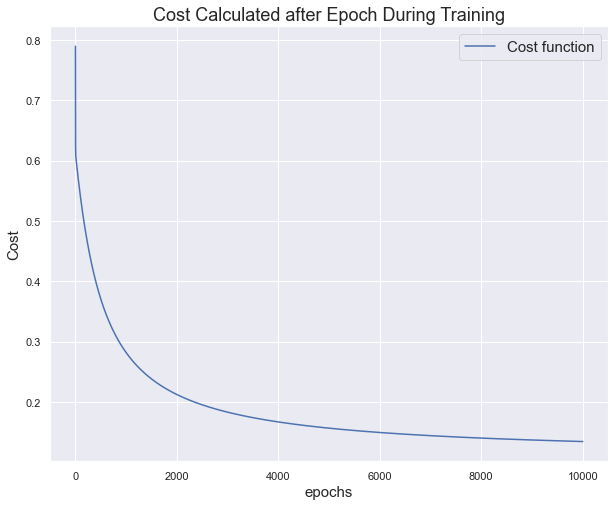

In [69]:
node.plot_cost_function()
plt.show()

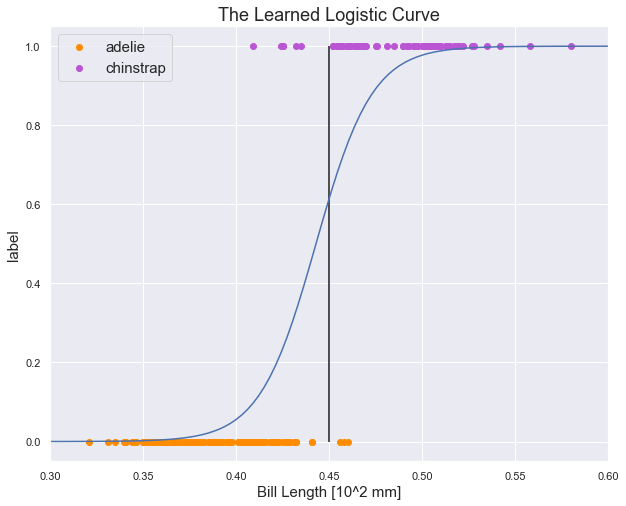

In [70]:
#Plotting the resulting sigmoid with respect to the data points

plt.figure(figsize = (10, 8))
plt.xlim((0.3, 0.6 ))
plt.scatter(adelie.bill_length_mm/100, 
            np.zeros(len(adelie.index)), 
            color = "darkorange", 
            label = "adelie")
plt.scatter(chinstrap.bill_length_mm/100, 
            np.ones(len(chinstrap.index)), 
            color = "mediumorchid", 
            label = "chinstrap")
plt.vlines(0.45, 0.0, 1.0)
plt.xlabel("Bill Length [10^2 mm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)

domain = np.linspace(0.3, 0.6, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Bill Length [10^2 mm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

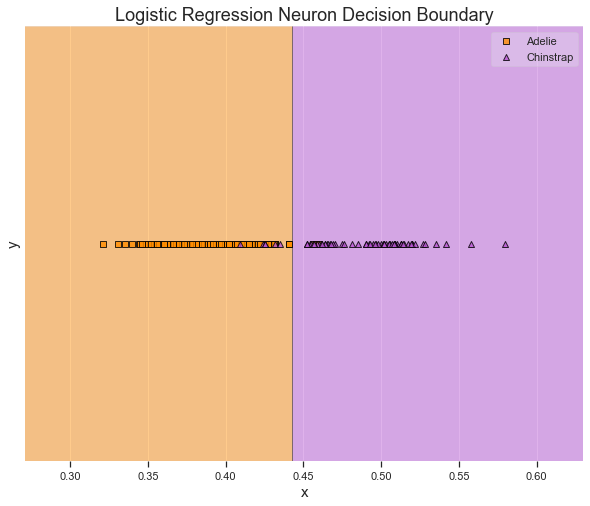

In [71]:
node.plot_decision_boundary(X, y)

In [72]:
node.predict(domain.reshape(-1, 1))

array([8.05441770e-05, 9.83571535e-05, 1.20109136e-04, 1.46670930e-04,
       1.79105738e-04, 2.18711608e-04, 2.67073235e-04, 3.26125121e-04,
       3.98228619e-04, 4.86265834e-04, 5.93754057e-04, 7.24985131e-04,
       8.85195108e-04, 1.08077061e-03, 1.31949959e-03, 1.61087586e-03,
       1.96646809e-03, 2.40036669e-03, 2.92972341e-03, 3.57540161e-03,
       4.36275741e-03, 5.32257431e-03, 6.49217628e-03, 7.91674527e-03,
       9.65086892e-03, 1.17603409e-02, 1.43242289e-02, 1.74372111e-02,
       2.12121563e-02, 2.57828871e-02, 3.13070028e-02, 3.79685610e-02,
       4.59802955e-02, 5.55849056e-02, 6.70547649e-02, 8.06891975e-02,
       9.68082834e-02, 1.15742030e-01, 1.37813804e-01, 1.63317234e-01,
       1.92486589e-01, 2.25461859e-01, 2.62251575e-01, 3.02698347e-01,
       3.46453726e-01, 3.92969556e-01, 4.41511607e-01, 4.91197847e-01,
       5.41058592e-01, 5.90110525e-01, 6.37432928e-01, 6.82233871e-01,
       7.23896799e-01, 7.62002815e-01, 7.96329358e-01, 8.26830088e-01,
      

In [73]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {round(100*sum(classification_error)/ len(y),2)}%")

Classification Error = 4.21%


Using just one feature (bill_length_mm) we've been able to reduce the error down to 5% - perhaps we can go even lower if we use a bill_length_mm and another variable.

## Increasing Features

In [74]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)
X_two = df_AC[["bill_length_mm", "body_mass_g"]].values

X_two[0:,0] = X_two[0:,0]/100
X_two[0:,1] = X_two[0:,1]/10000
X_two[0:5]

array([[0.391, 0.375],
       [0.395, 0.38 ],
       [0.403, 0.325],
       [0.367, 0.345],
       [0.393, 0.365]])

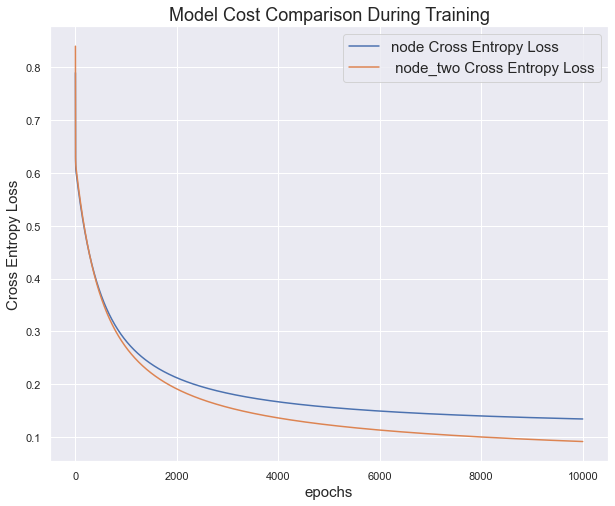

In [75]:
# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

Well, adding bill_depth_mm didn't do much. Maybe we could try a different variable? Lets try flipper_length_mm!

In [77]:
classification_error = (np.rint(node_two.predict(X_two)) != y).astype(int)
print(f"Classification Error = {round(100*sum(classification_error)/ len(y),2)}%")

Classification Error = 2.8%


Yes, adding another features decreases the error from >4% to >2%!